# Photoelasticity

Import necessary libraries

In [1]:
import numpy as np
import rawpy
import matplotlib.pyplot as plt
import os

from functions import load_raw_img

In [ ]:
base_path = "isotropic_images/"
file_type = ".CR2"

img_mean = None

file_names = os.listdir(base_path)
n_imgs = len(file_names)

for file_name in file_names:
    if file_name.endswith(file_type):
        if type(img_mean) == np.ndarray:
            img_mean += load_raw_img(base_path + file_name) // n_imgs
        else:
            img_mean = load_raw_img(base_path + file_name) // n_imgs


Display the mean of the images

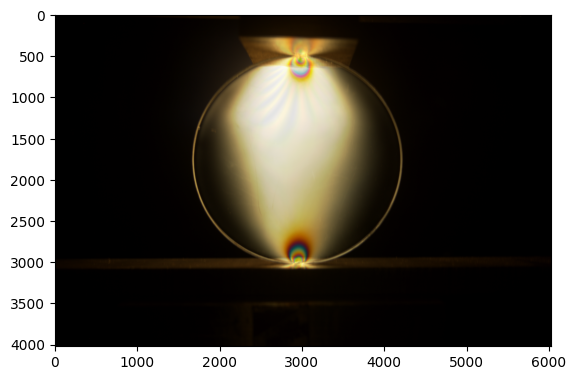

In [ ]:
plt.imshow(img_mean)

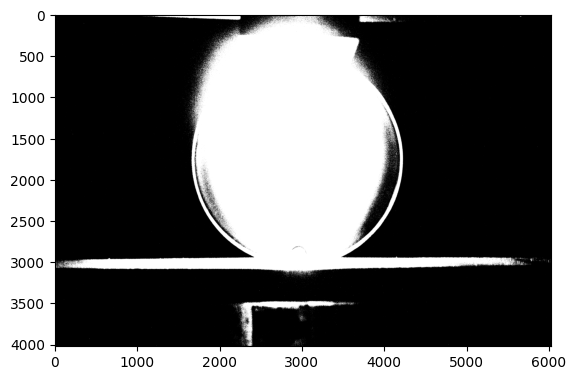

In [ ]:
img_thresh = img_mean[:,:,0] > 15

plt.imshow(img_thresh, cmap='gray')

### Isochromatic images

We used crossed quarter-wave plates to remove the isoclinics. 

We also used blue+yellow filter to restrict the light wavelength to a narrow band, approximating monochromatic light. 

Load and display the images with/without isoclinics, showing only the green channel.

In [5]:
img_isoclin = load_raw_img("Circular-Green-Images/IMG_3740.CR2")
img_no_isoclin = load_raw_img("Circular-Green-Images/IMG_3741.CR2")

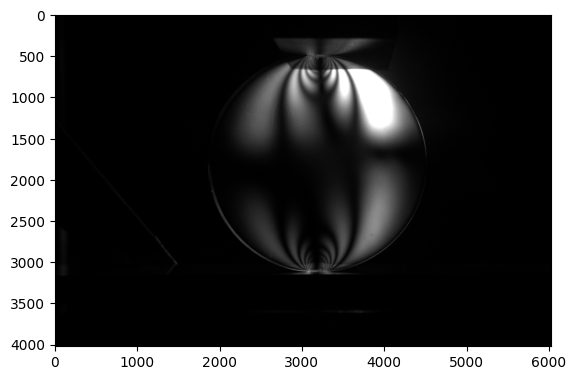

In [6]:
plt.imshow(img_isoclin[:,:,1], cmap='gray')

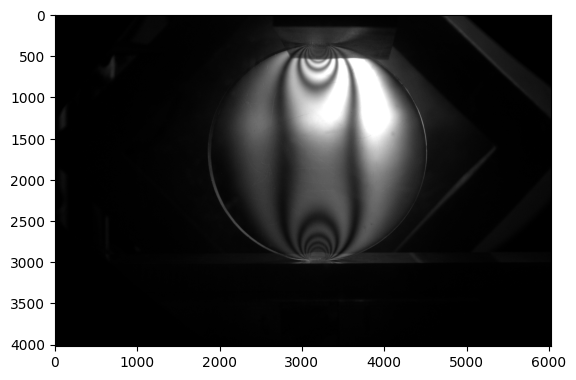

In [7]:
plt.imshow(img_no_isoclin[:,:,1], cmap='gray')

### Mask out the region of interest
For now, we do this manually. In future can use edge detection to automate. 

In [8]:
import cv2 as cv

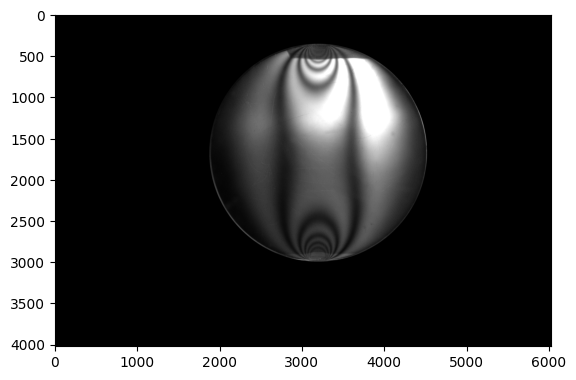

In [9]:
# Take only the green channel, and add a small buffer to differentiate between 
# masked off points and dark fringes
img_grey = img_no_isoclin[:, :, 1]

# Ensure no elements are > 255
# img_grey = np.clip(img_grey + 1, a_min=0, a_max=255)

mask = np.zeros(img_grey.shape, dtype=np.uint8)
mask = cv.circle(mask, (3190, 1680), 1320, 255, -1)

img = cv.bitwise_and(img_grey, mask)

plt.imshow(img, cmap='gray')

Identify the coordinates of the isotropic points
$$
(x_1, y_1) \quad \mathrm{and} \quad (x_2, y_2)
$$

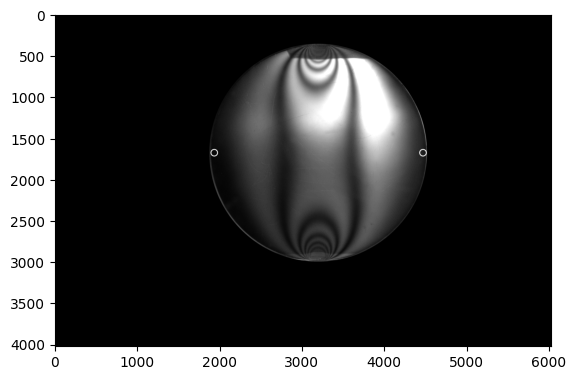

In [10]:
isotrope_1 = (1930, 1680)
isotrope_2 = (4460, 1680)

isotropes = [isotrope_1, isotrope_2]

img_isotropes = cv.circle(img.copy(), isotrope_1, 40, 255, 10)
img_isotropes = cv.circle(img_isotropes, isotrope_2, 40, 255, 10)

plt.imshow(img_isotropes, cmap='gray')

## Phase Unwrapping

For each isotrope, consider the pixels in the region of interest as a tree rooted at the isotrope. We want to iterate over the tree, finding the value of each pixel from the value of its neighbour. In this way, we can unwrap the phase at each point in the image. 

Isotropes are point of  0 phase.

In [ ]:
def phase_unwrap(img: np.ndarray, isotrope: tuple) -> np.ndarray:
    """
    Searches img from isotrope, returning array of phase values at each point 
    relative to the isotrope. 
    """
    # Initialise the stack to know which nodes to revisit
    stack = [isotrope]

    # Initialise a 2-d array of zeros to add the phases to as we iterate through
    phase_map = np.ones(img.shape, dtype=np.float32) * 0.1

    # Set the width and height of the image
    w, h = img.shape

    # While the stack is not empty, 
    while stack:
        # Pop the last element from the stack
        node = stack.pop()
        



### Fourier transform

In [14]:
# Fourier transform
img_ft = np.fft.fftshift(np.fft.fft2(img))

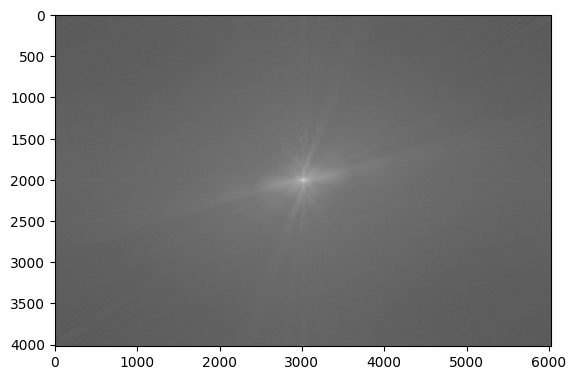

In [16]:
plt.imshow(np.log(abs(img_ft)), cmap='gray')

In [ ]:
img_1 = load_raw_img('circular-green-images/img_3741.CR2')

NameError: name 'load_raw_img' is not defined